<a href="https://colab.research.google.com/github/hossammohamed26/ML-LinearRegressionOneVariable/blob/main/LinearReg.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [68]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [69]:
dataset = pd.read_csv('diabetic_kidney_disease.csv')

In [70]:
dataset.insert(1,"x0",1)
print (dataset.head())


   FBG (mg/dL)  x0  ...  Total cholesterol (mg/dL)  UACR (mg/g creatinine)
0          140   1  ...                        144                    16.0
1          135   1  ...                        170                     8.0
2          140   1  ...                        180                    23.0
3          190   1  ...                        122                    38.0
4          250   1  ...                        167                    21.0

[5 rows x 5 columns]


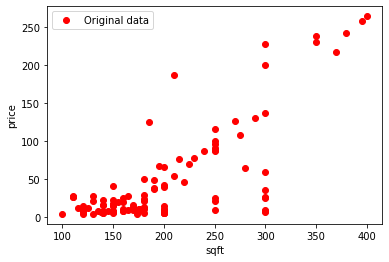

In [71]:
x_data = dataset.iloc[:,[0,1]]
y_data = dataset.iloc[:,-1]
plt.plot(x_data.iloc[:,0], y_data, 'ro', label='Original data') 
plt.xlabel("sqft")
plt.ylabel("price")
plt.legend()
plt.show()

In [72]:
#scaling
x_max=x_data.iloc[:,0].max()
x_data.iloc[:,0]=x_data.iloc[:,0]/x_max
print(x_max)
print(x_data)

400
     FBG (mg/dL)  x0
0         0.3500   1
1         0.3375   1
2         0.3500   1
3         0.4750   1
4         0.6250   1
..           ...  ..
105       0.7500   1
106       0.3250   1
107       0.6250   1
108       0.4250   1
109       0.5000   1

[110 rows x 2 columns]


/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1743: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)


In [73]:
#convert to matrix
x_data=np.array(x_data)
y_data=np.array(y_data).flatten()
print(x_data.shape)
print(y_data.shape)

(110, 2)
(110,)


In [74]:
#split data train & test 80/20
trainSize=int(y_data.size*.8)
testSize=round(y_data.size*.2)
print(trainSize,testSize)
xTrain=x_data[:trainSize]
xTest=x_data[trainSize:]

yTrain=y_data[:trainSize]
yTest=y_data[trainSize:]

print(xTrain,xTest)
print(len(yTrain),len(yTest))

88 22
[[0.35   1.    ]
 [0.3375 1.    ]
 [0.35   1.    ]
 [0.475  1.    ]
 [0.625  1.    ]
 [0.3    1.    ]
 [0.5    1.    ]
 [0.275  1.    ]
 [0.45   1.    ]
 [0.375  1.    ]
 [0.4    1.    ]
 [0.35   1.    ]
 [0.475  1.    ]
 [0.375  1.    ]
 [0.3125 1.    ]
 [0.75   1.    ]
 [0.3625 1.    ]
 [0.45   1.    ]
 [0.7    1.    ]
 [0.55   1.    ]
 [0.75   1.    ]
 [0.275  1.    ]
 [0.3    1.    ]
 [0.325  1.    ]
 [0.45   1.    ]
 [0.325  1.    ]
 [0.3875 1.    ]
 [0.45   1.    ]
 [0.375  1.    ]
 [0.75   1.    ]
 [0.375  1.    ]
 [0.525  1.    ]
 [0.5    1.    ]
 [0.475  1.    ]
 [0.35   1.    ]
 [0.5    1.    ]
 [0.525  1.    ]
 [0.75   1.    ]
 [0.425  1.    ]
 [0.4375 1.    ]
 [0.75   1.    ]
 [0.2875 1.    ]
 [0.3    1.    ]
 [0.275  1.    ]
 [0.4125 1.    ]
 [0.625  1.    ]
 [0.4    1.    ]
 [0.5    1.    ]
 [0.4    1.    ]
 [0.4625 1.    ]
 [0.75   1.    ]
 [0.425  1.    ]
 [0.625  1.    ]
 [0.575  1.    ]
 [0.6    1.    ]
 [0.5625 1.    ]
 [0.75   1.    ]
 [0.45   1.    ]
 [0.375 

In [75]:
alpha=.0001
ceta=np.array([0,0])
def gradientDescentOneVar():
    global ceta
    for i in range(100):
        y_pred = xTrain.dot(ceta) #loss
        ceta = ceta - (xTrain.T.dot(y_pred - yTrain)) * alpha * (1 / trainSize)
        ceta0,ceta1=ceta
        #print(MSE(ceta0,ceta1))
        print(ceta)

In [76]:
def MSE(ceta0,ceta1):
    Esum=0
    for i in range(trainSize):
        Esum+=pow( y_data[i] - (ceta0+ceta1*x_data[i]) , 2)
    Esum=Esum*(1/trainSize)
    return Esum

In [77]:
gradientDescentOneVar()

[0.00273465 0.0043292 ]
[0.00546901 0.00865784]
[0.00820308 0.01298591]
[0.01093686 0.01731341]
[0.01367035 0.02164034]
[0.01640356 0.0259667 ]
[0.01913647 0.03029249]
[0.0218691  0.03461772]
[0.02460144 0.03894238]
[0.02733349 0.04326647]
[0.03006525 0.04758999]
[0.03279672 0.05191295]
[0.03552791 0.05623533]
[0.03825881 0.06055715]
[0.04098941 0.0648784 ]
[0.04371973 0.06919909]
[0.04644977 0.0735192 ]
[0.04917951 0.07783875]
[0.05190897 0.08215773]
[0.05463813 0.08647615]
[0.05736701 0.090794  ]
[0.06009561 0.09511128]
[0.06282391 0.09942799]
[0.06555193 0.10374414]
[0.06827965 0.10805971]
[0.07100709 0.11237473]
[0.07373425 0.11668917]
[0.07646111 0.12100305]
[0.07918769 0.12531636]
[0.08191398 0.12962911]
[0.08463998 0.13394129]
[0.08736569 0.1382529 ]
[0.09009112 0.14256395]
[0.09281625 0.14687443]
[0.09554111 0.15118434]
[0.09826567 0.15549369]
[0.10098994 0.15980247]
[0.10371393 0.16411069]
[0.10643763 0.16841834]
[0.10916105 0.17272542]
[0.11188417 0.17703194]
[0.11460701 0.18

In [78]:
def calAccuracy():
    count=0
    ytestpred = xTest.dot(ceta)
    print(ytestpred[1],yTest[1])

In [79]:
calAccuracy()

0.6987584412798135 258.0
